In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import LSTM 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
from google.colab import files
import matplotlib.pyplot as mpl
import tensorflow as tf





In [0]:
files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
Saving Validation.csv to Validation.csv


{'Test.csv': b'Y,Hospital overall rating,Beds Available ,Doctors on Duty,Distance\r\n0,3,6,8,19\r\n1,4,16,5,5\r\n1,4,30,11,18\r\n0,4,13,16,20\r\n0,2,4,15,18\r\n1,4,28,9,4\r\n1,4,15,10,17\r\n0,3,24,5,17\r\n0,4,24,14,27\r\n1,4,30,20,16\r\n0,3,5,8,24\r\n1,5,7,15,26\r\n0,3,27,16,29\r\n1,3,27,8,9\r\n1,5,7,7,16\r\n0,1,15,20,16\r\n0,4,10,18,19\r\n1,5,15,18,10\r\n1,4,23,11,11\r\n0,4,24,9,27\r\n1,4,10,12,13\r\n0,3,19,5,13\r\n0,3,4,20,3\r\n0,3,5,17,20\r\n1,5,27,6,19\r\n1,4,13,19,6\r\n0,3,27,5,16\r\n0,4,14,9,26\r\n0,3,18,17,9\r\n1,4,16,9,8\r\n0,3,10,8,21\r\n0,3,20,14,15\r\n0,2,3,6,14\r\n1,4,22,14,10\r\n0,3,6,18,8\r\n0,3,30,17,18\r\n0,3,19,9,9\r\n1,4,28,20,9\r\n0,4,2,7,16\r\n0,3,5,10,27\r\n0,2,23,19,14\r\n1,3,27,10,1\r\n1,4,28,10,22\r\n0,2,25,19,22\r\n0,3,20,18,9\r\n0,3,12,7,12\r\n0,3,10,10,18\r\n0,3,16,12,13\r\n1,4,8,7,9\r\n0,4,15,5,25\r\n0,1,30,7,3\r\n1,4,23,9,13\r\n0,3,14,6,1\r\n1,4,7,15,9\r\n0,3,11,9,23\r\n0,3,21,5,17\r\n1,3,21,15,7\r\n0,3,3,6,29\r\n1,4,14,12,11\r\n0,3,11,18,4\r\n0,3,5,17,17\r

In [0]:
train = pd.read_csv('Train.csv').values
test = pd.read_csv('Test.csv').values
val = pd.read_csv('Validation.csv').values
train

array([[ 0,  3, 19, 19, 28],
       [ 0,  3,  5, 11,  2],
       [ 0,  3,  7,  7, 12],
       ...,
       [ 1,  4, 22, 18, 13],
       [ 0,  4,  2, 12, 15],
       [ 0,  3, 26, 13, 24]])

In [0]:
X_train = train[:, 1:].reshape(train.shape[0],1,2,2 ).astype( 'float32' )
X_train = X_train / 255.0

y_train = train[:,0]


# Reshape and normalize test data
X_test = test[:,1:].reshape(test.shape[0],1, 2, 2).astype( 'float32' )
X_test = X_test / 255.0

y_test = test[:,0]
x_val= val[:,1:].reshape(val.shape[0],1, 2, 2).astype( 'float32' )
x_val=x_val/255.0
y_val=val[:,0]


In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)

In [0]:
model = Sequential()
model.add(Convolution2D(1, 1, 1, border_mode= 'valid' , input_shape=(1, 2, 2),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Convolution2D(1, 1, 1, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation= 'softmax' ))
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= tf.keras.losses.Huber() , optimizer='adam' , metrics=[ 'accuracy','mae' ])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 1), input_shape=(1, 2, 2), activation="relu", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 1), activation="relu")`
  after removing the cwd from sys.path.


In [0]:
hist=model.fit(X_train, y_train,
          epochs=500,
          batch_size= 64, validation_data=(x_val, y_val))
score = model.evaluate(X_test, y_test, batch_size=64)

Train on 3005 samples, validate on 644 samples
Epoch 1/500
3005/3005 [==============================] - 3s 871us/step - loss: 0.1179 - acc: 0.6542 - mean_absolute_error: 0.4808 - val_loss: 0.1177 - val_acc: 0.6211 - val_mean_absolute_error: 0.4703
Epoch 2/500
3005/3005 [==============================] - 0s 56us/step - loss: 0.1133 - acc: 0.6542 - mean_absolute_error: 0.4543 - val_loss: 0.1182 - val_acc: 0.6211 - val_mean_absolute_error: 0.4627
Epoch 3/500
3005/3005 [==============================] - 0s 67us/step - loss: 0.1132 - acc: 0.6542 - mean_absolute_error: 0.4504 - val_loss: 0.1181 - val_acc: 0.6211 - val_mean_absolute_error: 0.4635
Epoch 4/500
3005/3005 [==============================] - 0s 56us/step - loss: 0.1132 - acc: 0.6542 - mean_absolute_error: 0.4518 - val_loss: 0.1181 - val_acc: 0.6211 - val_mean_absolute_error: 0.4631
Epoch 5/500
3005/3005 [==============================] - 0s 58us/step - loss: 0.1132 - acc: 0.6542 - mean_absolute_error: 0.4567 - val_loss: 0.1182 - va

In [0]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 1, 2, 1)           3         
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 1, 2, 1)           0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 1, 2, 1)           2         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 1, 2, 1)           0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 1, 2, 1)           0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_98 (Dense)             (None, 256)             

In [0]:
model.evaluate(X_test, y_test)[1]

646/646 [==============================] - 0s 62us/step


0.7151702787300381

In [0]:
score

[0.0957494793753875, 0.7151702787300381, 0.3919181888317545]

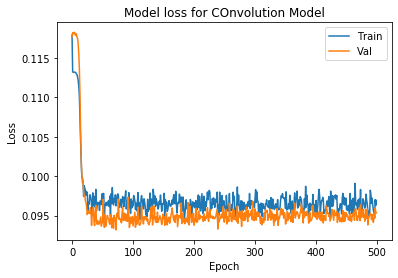

In [0]:
mpl.plot(hist.history['loss'])
mpl.plot(hist.history['val_loss'])
mpl.title('Model loss for COnvolution Model')
mpl.ylabel('Loss')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Val'], loc='upper right')
mpl.show()


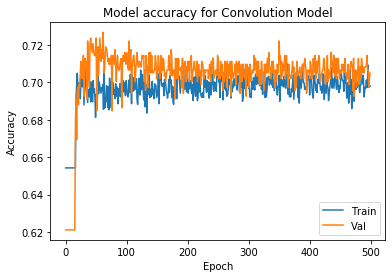

In [0]:
mpl.plot(hist.history['acc'])
mpl.plot(hist.history['val_acc'])
mpl.title('Model accuracy for Convolution Model')
mpl.ylabel('Accuracy')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Val'], loc='lower right')
mpl.show()
